# Superstore Sales Analysis Project
#### In this project, we analyze a superstore sales dataset to get business insights and forecast future sales trends.

## The features includes:
- Exploratory Data Analysis (EDA): Understanding customer segments, categories, and seasonal sales patterns.
- Data Visualization: Illustrating trends and getting more insights from the dataset with clear plots.
- Forecasting: Using Meta’s prophet model to predict future sales with trend and seasonality components.

## Information about the Dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('train.csv')
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [250]:
print(df.columns.tolist())

['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales']


## Data Cleaning & Preparation

In [238]:
# Convert to datetime
df['Order Date'] = pd.to_datetime(sales['Order Date'], dayfirst=[True])
df['Ship Date'] = pd.to_datetime(sales['Ship Date'], dayfirst=[True])

df['Postal Code'] = sales['Postal Code'].fillna(0) # numeric placeholder
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


# Exploratory Data Analysis (EDA)

**Why is it important for forecasting?**  
- Helps predict high and low sales periods accurately.  
- Prevents overestimating or underestimating demand.  
- Allows better planning of inventory, marketing, and promotions.  

**How we check for seasonality in our data:**  
- We calculate **average monthly sales for each segment**.  
- This shows which months consistently have higher or lower sales.  
- These patterns help improve the accuracy of our sales forecasts.

### 1) Total Sales by different Segments
#### We want to compare total sales across different segment to identify which division drives the most revenue.

In [241]:
sales_by_segment = df['Segment'].value_counts()
print(sales_by_segment)

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64


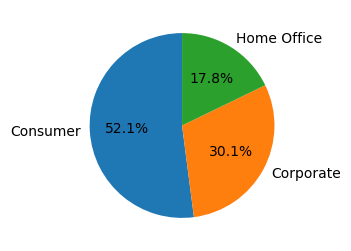

In [176]:
df['Segment'].value_counts().plot(kind='pie', figsize = (3,3), startangle=90, autopct='%1.1f%%')
plt.ylabel('Number of Sales')
plt.ylabel("")
plt.show()

#### Insights
- The Consumer segment has the highest number of orders, indicating it is the largest contributor to overall sales. This suggests that business strategies should prioritize consumer-focused products and marketing. 
- This indicates that individual customers contribute the most to overall sales, making them the primary driver of revenue. Corporate customers also represent a significant share, highlighting the importance of B2B sales, while the Home Office segment, though smaller, may still serve as a valuable niche market.
- These findings suggest that businesses should focus heavily on the Consumer segment while also exploring growth opportunities in Corporate and tailoring strategies to better engage the Home Office market.

#### Strategies to Increase Sales Include:
- Launching heavy marketing to retain repeat costumers in the consumers segment and build loyalty among the consumers.
- Providing B2B markets with discounts on their bulk orders.
- Using their purchase history to build costumer relations in order to send targeted promotions and coupons to understand their needs and offer solutions.

### 2) Total Sales by Several Categories of Products
#### We want to compare total sales across different product categories to identify which category drives the most revenue.

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64


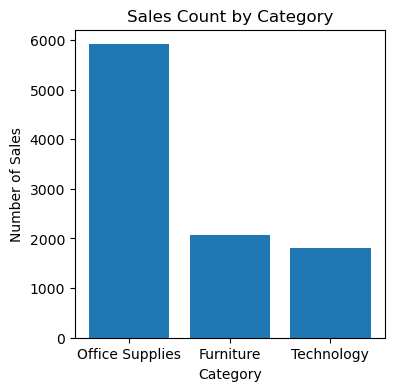

In [256]:
# Count sales by category
sales_by_category = df['Category'].value_counts()
print(sales_by_category)

# Bar plot
plt.figure(figsize=(4,4))
plt.bar(sales_by_category.index, sales_by_category.values)
plt.title('Sales Count by Category')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.show()

#### Insights
- Office supplies is the largest contributor to sales, displaying that everyday consumables and basic office products drive the majority of transactions.
- Furniture and Technology sales are areas where there are chances of higher growth with the following strategies.
#### Strategies to Increase Sales Include:
- Target areas where customers are buying more of these products by increasing visibility through banners, online ads, and local promotions in high-demand regions.

### 3) Count sales by sub-category
#### We want to compare total sales across different product categories to identify which set of products generates more sales.

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

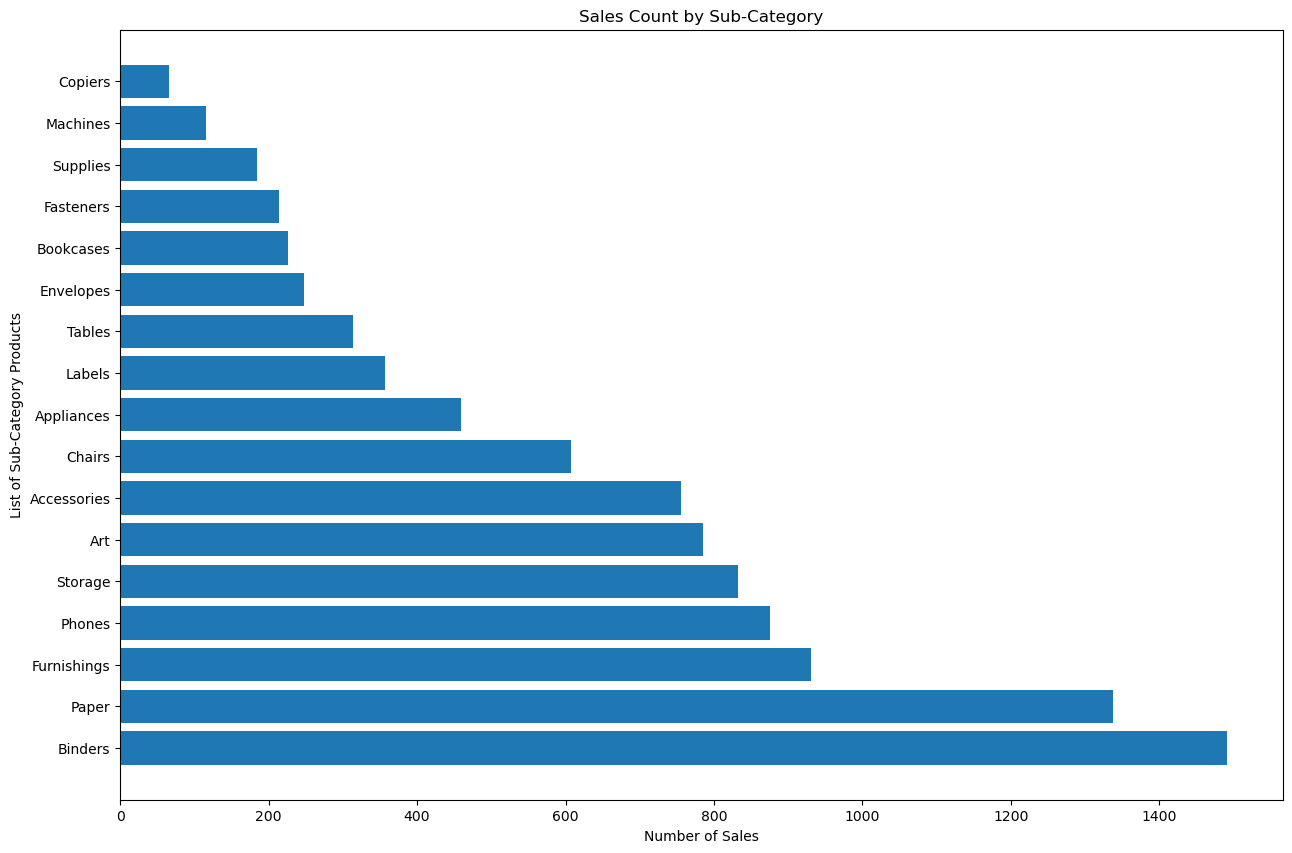

In [263]:
sales_by_subcategory = df['Sub-Category'].value_counts()
print(sales_by_subcategory)

# Bar plot
plt.figure(figsize=(15,10))
plt.barh(sales_by_subcategory.index, sales_by_subcategory.values)
plt.title('Sales Count by Sub-Category')
plt.ylabel('List of Sub-Category Products')
plt.xlabel('Number of Sales')
plt.show()

#### Insights
- Binders and Paper dominate sales, accounting for the highest counts at 1,492 and 1,338 respectively, indicating strong demand in basic office supplies.
- Furnishings, Phones, and Storage follow, showing a moderate level of business and consumer interest in office setup products.
- Art, Accessories, and Chairs maintain steady demand, likely due to costumers' personal choices.
#### Strategies to Increase Sales Include
- Providing B2B markets with discounts on bulk orders, particularly for Furnishings, Phones, and Storage, to encourage larger purchases.

### 4) Total Sales by Region
#### We want to compare total sales across different regions to identify what areas generate more sales.

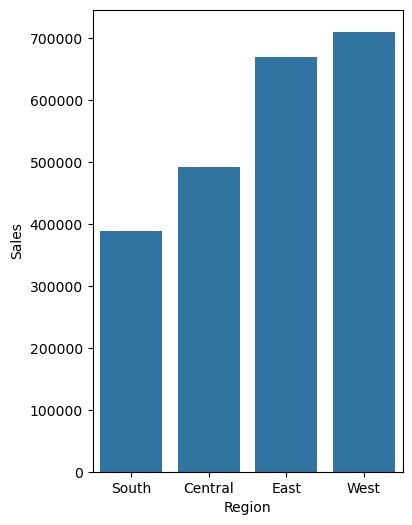

In [91]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
plt.figure(figsize=(4,6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.ylabel('Sales')
plt.show()

#### Insights
- The West region shows the highest revenue, while the Southern USA has the lowest.
- That has indicated lower customer demands of superstores which is mostly due to less marketing in such regions.
#### Strategies to Increase Sales Include
- Expand marketing efforts and optimise inventory in underperforming regions.
- Include regional discounts depending on people's culture that go well with their local tradition, festive events and public holidays to further increase sales.

### Sales by Ship Mode
#### We want to compare total sales to identify what modes of shipping generate more revenue.

Number of Orders: Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64


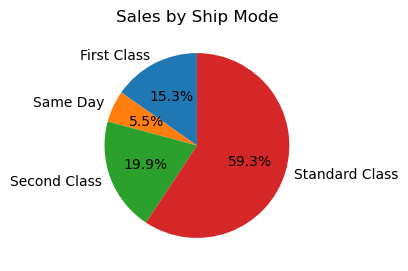

In [17]:
# Number of orders by Ship Mode
orders_by_shipmode = df['Ship Mode'].value_counts()
print("Number of Orders:", orders_by_shipmode)

ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum()
ship_mode_sales.plot(kind='pie',figsize=(3,3), autopct='%1.1f%%', startangle=90)
plt.title('Sales by Ship Mode')
plt.ylabel("")
plt.show()

#### Insights
- The pie chart shows that Standard Class dominates as the most common shipping mode, while Same Day deliveries are the least frequent.
- Second Class and First Class fall in between, with moderate order volumes.
#### Strategies to Increase Sales Include
- Since First Class and Same Day shipping modes have shown very few sales, the inclusion of promotions and upgrades for orders costing more than $200 can be considered to encourage customers to place repeat orders.

## Month-End Sales trend with time

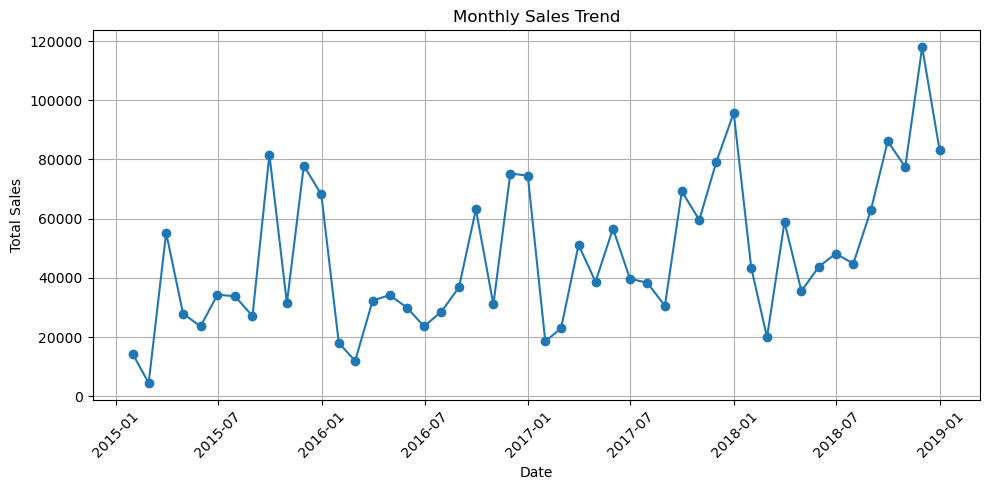

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
monthly_sales = df.set_index('Order Date')['Sales'].resample('ME').sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Insights
- The time series plot shows noticeable spikes right after the beginning of each month.
- This pattern suggests that customers are more active in making purchases at the start of the month, likely influenced by fresh salary credits, budget resets, or promotional campaigns timed with month-beginnings.